# Парное выравнивание

# Порядок сдачи домашнего

Вам требуется создать гит репозиторий куда вы будете складывать все ваши домашние. Под каждое домашнее вы создаете отдельную ветку куда вносите все изменения в рамках домашнего. Как только домашнее готово - создаете пулл реквест (обратите внимание что в пулл реквесте должны быть отражены все изменения в рамках домашнего). Ревьювера назначаете из таблицы - https://docs.google.com/spreadsheets/d/1vK6IgEqaqXniUJAQOOspiL_tx3EYTSXW1cUrMHAZFr8/edit?gid=0#gid=0
Перед сдачей проверьте код, напишите тесты. Не забудьте про PEP8, например, с помощью flake8. Задание нужно делать в jupyter notebook.

**Дедлайн - 30 сентября 10:00**

# Введение

**Выравнивание последовательностей** — фундаментальный инструмент в биоинформатике, позволяющий сравнивать биологические последовательности (ДНК, РНК, белки) для выявления сходства, которое может указывать на функциональные, структурные или эволюционные связи между ними.

**Парное выравнивание** подразумевает сравнение двух последовательностей для определения наилучшего соответствия между их элементами (нуклеотидами или аминокислотами). Существует два основных типа парного выравнивания:

- **Глобальное выравнивание**: направлено на выравнивание всей длины двух последовательностей, максимально учитывая все элементы.
- **Локальное выравнивание**: нацелено на поиск наилучшего соответствующего участка внутри двух последовательностей.

В данном домашнем задании мы с вами сконцентрируемся на **глобальном выравнивании**.

### Пример парного выравнивания

Рассмотрим две нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G A
Последовательность 2 (Seq2): G C T A G A
```

**Глобальное выравнивание** (учитывает всю длину последовательностей):

```
Seq1: A G C T A C G A
Seq2: - G C T A - G A
```

### Значение выравнивания последовательностей

- **Эволюционные связи**: Сходство между последовательностями может указывать на общих предков.
- **Функциональные домены**: Выравнивание помогает идентифицировать консервативные участки, важные для функции белка или нуклеиновой кислоты.
- **Геномные исследования**: Используется для аннотации генов, предсказания структур и понимания генетических вариаций.

## Алгоритм выравнивания

- Для автоматизации процесса выравнивания используется **Алгоритм Нидлмана-Вунша**. Он предназначен для глобального выравнивания и использует динамическое программирование для нахождения оптимального выравнивания по всей длине последовательностей. 
- Для оценки сходства при выравнивании белковых последовательностей используется матрица **BLOSUM** (Blocks Substitution Matrix). Матрицы BLOSUM создаются на основе статистического анализа реальных белковых множественных выравниваний последовательностей.

### Пример множественного выравнивания (для построения матрциы BLOSUM)

Рассмотрим нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G T G T C G C T G A A T C T A T G A C T
Последовательность 2 (Seq2): G C T A G A G C A A G G C A A C T G C A T C T
Последовательность 3 (Seq3): A C T G C A C C C A T G A A C C T C G C G C T
Последовательность 4 (Seq4): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 5 (Seq5): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 6 (Seq6): A C T G C A C C C A T G A A C C T C T C A C T
Последовательность 7 (Seq7): A C T G C A C C C A T G A A C C T C T C A C T
```

**Множественное выравнивание**:

```
Seq1: A G C T A C G T G T C G C T G A A T C T A T G A C T
Seq2: - G C T A - G A G C A - A G G C A A C T G C A T C T
Seq3: A - C T G - C A C C C - A T G A A C C T C G C G C T
Seq4: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq5: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq6: A - C T G - C A C C C - A T G A A C C T C T C A C T
Seq7: A - C T G - C A C C C - A T G A A C C T C T C A C T
```

Перед тем как приступать к реализации парного выравнивания давайте научимся считать матрицу BLOSUM.

# Матрица BLOSUM

## Подсчет частот пар нуклеотидов

### Шаг 1.1: Генерация пар нуклеотидов

Напишите функцию `generate_pairs(alignments)`, которая проходит по всем позициям выравнивания и генерирует все возможные пары нуклеотидов в этой позиции.

**Пример**:

Рассмотрим на примере множественного выравнивания выше:

```
generate_pairs(["A", "A", "G"])
[('A', 'A'), ('A', 'G'), ('A', 'G')]

generate_pairs(["T", "T", "T"])
[('T', 'T'), ('T', 'T'), ('T', 'T')]

generate_pairs(["G", "G", "-"])
[('G', 'G'), ('G', '-'), ('G', '-')]

len(generate_pairs(['A', 'T', 'G', 'G', 'G', 'A', 'A']))
21
```

In [1]:
alignments = ["AGCTACGTGTCGCTGAATCTATGACT", 
              "-GCTA-GAGCA-AGGCAACTGCATCT", 
              "A-CTG-CACCC-ATGAACCTCGCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCACT",
              "A-CTG-CACCC-ATGAACCTCTCACT"
             ]

In [2]:
def generate_pairs(alignments):
    answer = []
    for line in zip(*alignments):
        for i in range(len(line)-1):
            for j in range(1, len(line)-i):
                answer.append((line[i], line[j+i]))
    return answer
    
# print(generate_pairs(alignments))

In [3]:
def test_generate_pairs():
    alignments = ["A", "A", "G"]
    expected = [('A', 'A'), ('A', 'G'), ('A', 'G')]
    result = generate_pairs(alignments)
    assert result == expected, f"Expected {expected}, but got {result}"

    alignments = ["T", "T", "T"]
    expected = [('T', 'T'), ('T', 'T'), ('T', 'T')]
    result = generate_pairs(alignments)
    assert result == expected, f"Expected {expected}, but got {result}"

    alignments = ["G", "G", "-"]
    expected = [('G', 'G'), ('G', '-'), ('G', '-')]
    result = generate_pairs(alignments)
    assert result == expected, f"Expected {expected}, but got {result}"
    
    return "everything is working fine!"

print(test_generate_pairs())

everything is working fine!


### Шаг 1.2: Подсчет частот пар

Используйте полученные пары для подсчета частоты каждой пары нуклеотидов. Создайте словарь `pair_counts`, где ключом является кортеж из двух нуклеотидов, а значением — количество их совместных появлений. Пропуски в выравнивании нужно пропускать (если один из символ в выравнивании `'-'`)

**Подсказка**: Учитывайте, что матрица симметрична, поэтому пары `('A','G')` и `('G','A')` должны считаться одинаковыми.

**Пример**:

```
pair_counts = count_pairs(alignments)
pair_counts
{('A', 'A'): 38, ('G', 'G'): 16, ('C', 'C'): 57, ('T', 'T'): 39, ('A', 'G'): 11,
 ('C', 'G'): 19, ('A', 'T'): 8, ('C', 'T'): 10, ('A', 'C'): 21, ('G', 'T'): 8}}
```

In [4]:
def count_pairs(alignments):
    result = dict()
    for pair in generate_pairs(alignments):
        if "-" not in pair:
            sorted_pair = tuple(sorted(pair))
            result[sorted_pair] = result.get(sorted_pair, 0) + 1
    # 478
    return result
    
print(count_pairs(alignments))

{('A', 'A'): 85, ('G', 'G'): 37, ('C', 'C'): 143, ('T', 'T'): 88, ('A', 'G'): 21, ('C', 'G'): 31, ('A', 'T'): 10, ('C', 'T'): 16, ('A', 'C'): 33, ('G', 'T'): 14}


In [6]:
def test_count_pairs():
    result_empty = count_pairs(["", "", ""])
    assert result_empty == {}, f"Expected {{}} for empty alignments, but got {result_empty}"

    alignments_with_gaps = ["A", "G", "-"]
    expected_with_gaps = {('A', 'G'): 1}
    result_with_gaps = count_pairs(alignments_with_gaps)
    assert result_with_gaps == expected_with_gaps, f"Expected {expected_with_gaps}, but got {result_with_gaps}"

    return "everything is working fine!"

print(test_count_pairs())

everything is working fine!


## Вычисление ожидаемых частот

Реализуйте функцию `calculate_frequencies`, которая будет вычислять частоту нуклеотида по множественному выравниванию

**Пример**:

```
freqs = calculate_frequencies(alignments)
print("Частоты:")
for x, freq in freqs.items():
    print(f"{x}: {freq:.4f}")
    
Частоты:
A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195
```

In [7]:
def calculate_frequencies(alignments):
    freqs = dict()
    counter = 0
    
    for line in alignments:
        for char in line:
            if char != "-":
                freqs[char] = freqs.get(char, 0) +1
                counter += 1
    return {char:freqs[char] / counter for char in freqs}


for x, freq in calculate_frequencies(alignments).items():
    print(f"{x}: {freq:.4f}")

A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195


In [8]:
def test_calculate_frequencies():
    expected = {'A': 0.2439, 'G': 0.1585, 'C': 0.3780, 'T': 0.2195}
    result = calculate_frequencies(alignments)
    for key in expected:
        assert abs(result[key] - expected[key]) < 0.0001, f"Expected {expected[key]} for {key}, but got {result[key]}"

    result_empty = calculate_frequencies(["", "", ""])
    assert result_empty == {}, f"Expected {{}} for empty alignments, but got {result_empty}"

    alignments_with_gaps = ["A", "G", "-"]
    expected_with_gaps = {'A': 0.5, 'G': 0.5}
    result_with_gaps = calculate_frequencies(alignments_with_gaps)
    for key in expected_with_gaps:
        assert abs(result_with_gaps[key] - expected_with_gaps[key]) < 0.0001, f"Expected {expected_with_gaps[key]} for {key}, but got {result_with_gaps[key]}"

    return "everything is working fine!"

print(test_calculate_frequencies())

everything is working fine!


##  Расчет логарифмических коэффициентов

- Для каждой пары нуклеотидов `(x, y)` вычислите логарифмический коэффициент замены по формуле:


$$S(x, y) = scale * \log_2 \left( \frac{observed\_freq[x, y]}{expected\_freq[x, y]} \right)$$

- Здесь `observed_freq` — наблюдаемая частота пары из `pair_counts` деленное на общее количество пар, а `expected_freq` — ожидаемая частота, которую можно вычислить как `expected_freq[x, y] = freqs[x] * freqs[y]`

- Для удобства представления округлите значения `S(x, y)` до целых чисел, умножив на масштабный фактор (например, 3).

**Пример:**

```python
scores = calculate_scores(pair_counts, freqs)
scores
{('A', 'A'): 4, ('G', 'G'): 4, ('C', 'C'): 2, ('T', 'T'): 6, ('A', 'G'): 1,
 ('C', 'G'): 1, ('A', 'T'): -1, ('C', 'T'): -2, ('A', 'C'): 0, ('G', 'T'): 0}
```


In [9]:
import math 
# def calculate_scores(pair_counts, freqs, scale=3):
    # pass
def calculate_scores(pair_counts, freqs, scale=3):
    return {pair:round(scale*math.log((pair_counts[pair]/sum(pair_counts.values()))/(freqs[pair[0]]*freqs[pair[1]]), 2)) 
            if sum(pair_counts.values()) else 0 for pair in pair_counts}
    

for pair, freq in calculate_scores(count_pairs(alignments), calculate_frequencies(alignments)).items():
    print(f"{pair}: {freq:.4f}")

('A', 'A'): 5.0000
('G', 'G'): 5.0000
('C', 'C'): 3.0000
('T', 'T'): 6.0000
('A', 'G'): 1.0000
('C', 'G'): 0.0000
('A', 'T'): -4.0000
('C', 'T'): -4.0000
('A', 'C'): -1.0000
('G', 'T'): -1.0000


In [11]:
def test_calculate_scores():
    pair_counts = {('A', 'A'): 85, ('G', 'G'): 37, ('C', 'C'): 143, ('T', 'T'): 88, ('A', 'G'): 21, 
                   ('C', 'G'): 31, ('A', 'T'): 10, ('C', 'T'): 16, ('A', 'C'): 33, ('G', 'T'): 14}
    freqs = {'A': 0.2439, 'G': 0.1585, 'C': 0.3780, 'T': 0.2195}

    # Тест 1
    expected_scores = {('A', 'A'): 5, ('G', 'G'): 5, ('C', 'C'): 3, ('T', 'T'): 6, ('A', 'G'): 1,
                       ('C', 'G'): 0, ('A', 'T'): -4, ('C', 'T'): -4, ('A', 'C'): -1, ('G', 'T'): -1}

    result = calculate_scores(pair_counts, freqs)
    for key in expected_scores:
        assert abs(result[key] - expected_scores[key]) < 0.0001, f"Expected {expected_scores[key]} for {key}, but got {result[key]}"

    # Тест 2: Проверка на пустые данные
    result_empty = calculate_scores({}, {})
    assert result_empty == {}, f"Expected {{}} for empty data, but got {result_empty}"

    # Тест 3: Проверка на данные с нулевыми частотами
    pair_counts_zero_freq = {('A', 'A'): 0}
    freqs_zero = {'A': 0.0}
    result_zero_freq = calculate_scores(pair_counts_zero_freq, freqs_zero)
    assert result_zero_freq == {('A', 'A'): 0}, f"Expected -inf for zero frequencies, but got {result_zero_freq}"

    return "everything is working fine!"

print(test_calculate_scores())    

everything is working fine!



## Составление матрицы BLOSUM

### Шаг 4.1: Заполнение матрицы

- Реализуйте функцию `create_blosum_matrix`, для создания BLOSUM матрицы.
- Используйте рассчитанные ранее логарифмические коэффициенты `scores` для заполнения матрицы.
- Учитывайте, что матрица симметрична: `S(x, y) = S(y, x)`.

**Пример:**

```python
blosum_matrix = create_blosum_matrix(scores, nucleotides)
blosum_matrix
{'A': {'A': 4, 'G': 1, 'C': 0, 'T': -1},
 'G': {'A': 1, 'G': 4, 'C': 1, 'T': 0},
 'C': {'A': 0, 'G': 1, 'C': 2, 'T': -2},
 'T': {'A': -1, 'G': 0, 'C': -2, 'T': 6}}
```


In [12]:
def get_nucleotides():
    return ["A", "G", "C", "T"]

def create_blosum_matrix(scores, nucleotides=get_nucleotides()):
    result = {char:{ch:0 for ch in nucleotides} for char in nucleotides}
    for pair in scores:
        x, y = pair
        score = scores.get(pair, 0)
        result[x][y] = score
        result[y][x] = score

    return result

blosum_matrix = create_blosum_matrix(calculate_scores(count_pairs(alignments),calculate_frequencies(alignments)))
blosum_matrix

{'A': {'A': 5, 'G': 1, 'C': -1, 'T': -4},
 'G': {'A': 1, 'G': 5, 'C': 0, 'T': -1},
 'C': {'A': -1, 'G': 0, 'C': 3, 'T': -4},
 'T': {'A': -4, 'G': -1, 'C': -4, 'T': 6}}

In [13]:
def test_create_blosum_matrix():
    scores = {('A', 'A'): 1, ('G', 'G'): 2, ('C', 'C'): 3, ('T', 'T'): 4, ('A', 'G'): 5}
    nucleotides = ['A', 'G', 'C', 'T']

    expected_matrix = {
        'A': {'A': 1, 'G': 5, 'C': 0, 'T': 0},
        'G': {'A': 5, 'G': 2, 'C': 0, 'T': 0},
        'C': {'A': 0, 'G': 0, 'C': 3, 'T': 0},
        'T': {'A': 0, 'G': 0, 'C': 0, 'T': 4},
    }
    result = create_blosum_matrix(scores, nucleotides)
    assert result == expected_matrix, f"Expected {expected_matrix}, but got {result}"

    
    result_empty = create_blosum_matrix({}, [])
    assert result_empty == {}, f"Expected {{}} for empty data, but got {result_empty}"

    
    scores_single = {('A', 'A'): 1}
    nucleotides_single = ['A']
    expected_single = {'A': {'A': 1}}
    result_single = create_blosum_matrix(scores_single, nucleotides_single)
    assert result_single == expected_single, f"Expected {expected_single}, but got {result_single}"

    return "everything is working fine!"

print(test_create_blosum_matrix())

everything is working fine!


### Шаг 4.2: Вывод матрицы

- Выведите матрицу BLOSUM в удобочитаемом формате, например, как таблицу с заголовками.

**Пример:**

```python
print_blosum_matrix(blosum_matrix, nucleotides)
    A   G   C   T
A   4   1   0  -1
G   1   4   1   0
C   0   1   2  -2
T  -1   0  -2   6
```

In [14]:
def print_blosum_matrix(matrix, nucleotides=get_nucleotides()):
    header = [" "] + nucleotides
    result = [[item.ljust(4) for item in header]] + [[item]+list(map(lambda x:str(round(x, 1)).rjust(4), matrix[item].values())) for item in matrix]
    [print(" ".join(row)) for row in result]

print_blosum_matrix(matrix=create_blosum_matrix(calculate_scores(count_pairs(alignments), calculate_frequencies(alignments))))

     A    G    C    T   
A    5    1   -1   -4
G    1    5    0   -1
C   -1    0    3   -4
T   -4   -1   -4    6


## Визуализация результатов

Запустите код для визуализации результатов. Потребуется установить пакеты через `pip install numpy`

In [ ]:
pip install seaborn

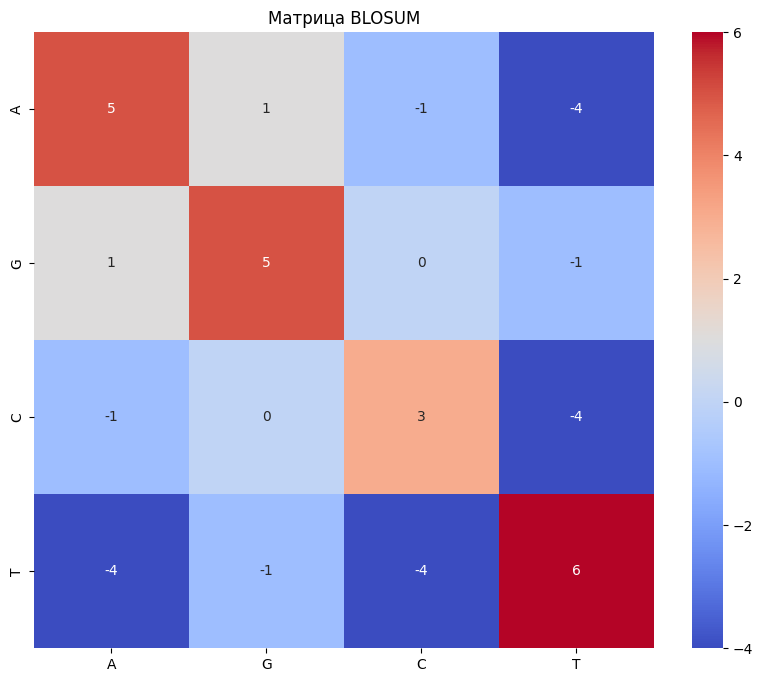

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_blosum_matrix(matrix, nucleotides=get_nucleotides()):
    data = np.array([[matrix[x][y] for y in nucleotides] for x in nucleotides])
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, xticklabels=nucleotides, yticklabels=nucleotides, annot=True, cmap="coolwarm")
    plt.title("Матрица BLOSUM")
    plt.show()

# Пример использования
visualize_blosum_matrix(blosum_matrix)

# Реализация алгоритма Нидлмана-Вунша

### Шаг 5: Инициализация матрицы динамического программирования

Теперь перейдём к реализации алгоритма [Нидлмана-Вунша](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm).

Реализуйте функцию `init`, которая по $m, n$ и ошибке $\sigma$ строит матрицу c $m + 1$ строкой и $n + 1$ столбцом:

$$A_{m,n} = \begin{pmatrix} 0 & -\sigma & \cdots & -n \sigma \\ -\sigma & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ -m\sigma & 0 & \cdots & 0 \end{pmatrix} $$

**Пример:**

```python
print(init(3, 3, 4))
[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]
```

In [16]:
def init(rows, cols, gap_penalty=10):
    matrix = [[0]*(cols+1) for _ in range(rows+1)]

    for j in range(1, cols + 1):
        matrix[0][j] = -j * gap_penalty
    for i in range(1, rows + 1):
        matrix[i][0] = -i * gap_penalty
    return matrix

print(init(3, 3, 4))

[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]


In [17]:
def test_init():
    rows, cols = 3, 5
    expected_matrix = [
        [0, -10, -20, -30, -40, -50],
        [-10, 0, 0, 0, 0, 0],
        [-20, 0, 0, 0, 0, 0],
        [-30, 0, 0, 0, 0, 0]
    ]
    result = init(rows, cols)
    assert result == expected_matrix, f"Expected {expected_matrix}, but got {result}"

    expected_single_row = [[0, -10], [-10, 0]]
    result_single_row = init(1, 1)
    assert result_single_row == expected_single_row, f"Expected {expected_single_row}, but got {result_single_row}"

    expected_zero = [[0]]
    result_zero = init(0, 0)
    assert result_zero == expected_zero, f"Expected {expected_zero}, but got {result_zero}"

    return "everything is working fine!"

print(test_init())

everything is working fine!


### Шаг 6: Заполнение матрицы динамического программирования

Пусть `a` и `b` - две последовательности, которые хотим выравнять. Теперь имея пустую матрицу, нужно научиться её заполнять. Для этого вспомним, как вычисляется очередной элемент матрицы:

$$A_{i \ j} = max \begin{cases} A_{i-1 \ j-1} + s(a_{i},b_{j}) & \ \text{Match / Mismatch}\\ A_{i \ j-1} - \sigma & \ \text{Insertion} \\ A_{i-1\ j} - \sigma & \ \text{Deletion} \end{cases}$$

где $s(a_{i},b_{j})$ - значение матрицы BLOSUM для нуклеотидов $a_{i}$ и $b_{j}$, $\sigma$ - штраф за пропуск символа в выравнивании (параметр)

### Шаг 7: Вычисление значения матрицы

Реализуйте функцию `get_new_score`, которая принимает на вход 5 параметров - `up` ($A_{i-1\ j}$), `left` ($A_{i \ j-1}$), `middle` ($A_{i-1 \ j-1}$), `s_score` ($s(a_{i},b_{j})$), `gap_penalty` ($\sigma$), и вычисляет значение для матрицы $A_{i\ j}$

**Пример:**

```python
print(get_new_score(0, 10, 2, 0, 2))
8
print(get_new_score(-16, -7, -14, 0, 2))
-9
```

In [18]:
def get_new_score(up, left, middle, s_score, gap_penalty):
    return max(middle+s_score,left-gap_penalty, up-gap_penalty)


In [19]:
assert get_new_score(0, 10, 2, 0, 2) == 8
assert get_new_score(-16, -7, -14, 0, 2) == -9

### Шаг 8 Заполнение матрицы

Реализуйте функцию `align`,  которая на вход принимает две последовательности ДНК, штраф за пропуск ($\sigma$), матрицу BLOSUM и возвращает заполненную матрицу `A`.

**Пример:**

```python
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

print(align(top_seq, bottom_seq, gap_penalty, blosum_matrix))
[[0, -2, -4, -6, -8, -10, -12, -14, -16],
 [-2, -1, -2, 2, 0, -2, -4, -6, -8],
 [-4, 2, 0, 0, 6, 4, 2, 0, -2],
 [-6, 0, 2, 6, 4, 4, 4, 2, 0],
 [-8, -2, 4, 4, 7, 5, 8, 6, 4],
 [-10, -4, 2, 2, 5, 9, 7, 10, 8]]
```

In [20]:
top_seq = "AGTACGCA"  # 8 - cols
bottom_seq = "TATGC"  # 5 - rows
gap_penalty = 2

In [21]:
def align(top_seq, bottom_seq, gap_penalty, blosum_matrix):
    matrix = init(len(bottom_seq), len(top_seq), gap_penalty)
    for i in range(1, len(matrix)):
        for j in range(1, len(matrix[i])):
            matrix[i][j] = get_new_score(matrix[i-1][j],
                                         matrix[i][j-1],
                                         matrix[i-1][j-1],
                                         blosum_matrix[top_seq[j-1]][bottom_seq[i-1]],
                                         gap_penalty)
    # print("\n".join([" ".join(map(lambda char: str(round(char, 1)).rjust(5).ljust(5), line)) for line in matrix]))
    return matrix

print(align(top_seq,
            bottom_seq,
            gap_penalty,
            create_blosum_matrix(calculate_scores(count_pairs(alignments), calculate_frequencies(alignments)))))

[[0, -2, -4, -6, -8, -10, -12, -14, -16], [-2, -4, -3, 2, 0, -2, -4, -6, -8], [-4, 3, 1, 0, 7, 5, 3, 1, -1], [-6, 1, 2, 7, 5, 3, 4, 2, 0], [-8, -1, 6, 5, 8, 6, 8, 6, 4], [-10, -3, 4, 3, 6, 11, 9, 11, 9]]


In [22]:
def test_align():
    top_seq = "AGTACGCA"
    bottom_seq = "TATGC"
    gap_penalty = 2
    blosum_matrix = create_blosum_matrix(calculate_scores(count_pairs(alignments), calculate_frequencies(alignments)))
    expected_matrix = [
        [0, -2, -4, -6, -8, -10, -12, -14, -16],
        [-2, -4, -3, 2, 0, -2, -4, -6, -8],
        [-4, 3, 1, 0, 7, 5, 3, 1, -1],
        [-6, 1, 2, 7, 5, 3, 4, 2, 0],
        [-8, -1, 6, 5, 8, 6, 8, 6, 4],
        [-10, -3, 4, 3, 6, 11, 9, 11, 9]
    ]
    result = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
    assert result == expected_matrix, f"Expected {expected_matrix}, but got {result}"

    top_seq_empty = ""
    bottom_seq_empty = ""
    expected_empty = [[0]]
    result_empty = align(top_seq_empty, bottom_seq_empty, gap_penalty, blosum_matrix)
    assert result_empty == expected_empty, f"Expected {expected_empty}, but got {result_empty}"

    top_seq_single = "A"
    bottom_seq_single = "G"
    expected_single = [[0, -2], [-2, 1]]
    result_single = align(top_seq_single, bottom_seq_single, gap_penalty, blosum_matrix)
    assert result_single == expected_single, f"Expected {expected_single}, but got {result_single}"
    
    return "everything is working fine!"
print(test_align())

everything is working fine!


### Шаг 9: Построение выравнивания

Теперь имея матрицу выравнивания построим самое выравнивание.

Реализуйте функцию get_alignment, которая по двум последовательностям, матрице выравнивания, штрафа за пропуски, бонусам за совпадение/несовпадение нуклеотидов строит выравнивание.

**Пример:**

```python

top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
--TATGC-
AGTACGCA

top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
ACTTCTACCCCAGC
AGT-CT-CCCC--C
```

In [23]:
def get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix):
    i, j = len(bottom_seq), len(top_seq)
    alignmentA, alignmentB = "", ""
    
    while i > 0 or j > 0:
        if i > 0 and j > 0 and sm[i][j] == sm[i-1][j-1] + blosum_matrix[top_seq[j-1]][bottom_seq[i-1]]:
            alignmentA = top_seq[j-1] + alignmentA
            alignmentB = bottom_seq[i-1] + alignmentB
            i -= 1
            j -= 1

        elif i > 0 and sm[i][j] == sm[i-1][j] - gap_penalty:
            alignmentA = "-" + alignmentA
            alignmentB = bottom_seq[i-1] + alignmentB
            i -= 1
        elif j > 0 and sm[i][j] == sm[i][j - 1] - gap_penalty:
            alignmentA = top_seq[j-1] + alignmentA
            alignmentB = "-" + alignmentB
            j -= 1
        else:
            # ожидаем ошибку, мало ли
            break
    return [alignmentA, alignmentB]

In [24]:
def test_get_alignment():
    top_seq = "AGTACGCA"
    bottom_seq = "TATGC"
    gap_penalty = 2
    blosum_matrix = create_blosum_matrix(calculate_scores(count_pairs(alignments), calculate_frequencies(alignments))) 
    sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
    
    expected_alignment = ['AGTACGCA', '--TATGC-']
    result = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
    assert result == expected_alignment, f"Expected {expected_alignment}, but got {result}"

    top_seq_empty = ""
    bottom_seq_empty = ""
    expected_empty = ["", ""]
    result_empty = get_alignment(top_seq_empty, bottom_seq_empty, sm, gap_penalty, blosum_matrix)
    assert result_empty == expected_empty, f"Expected {expected_empty}, but got {result_empty}"

    top_seq_single = "A"
    bottom_seq_single = "G"
    expected_single = ["A-", "-G"]
    result_single = get_alignment(top_seq_single, bottom_seq_single, sm, gap_penalty, blosum_matrix)
    assert result_single == expected_single, f"Expected {expected_single}, but got {result_single}"

    return "everything is working fine!"

print(test_get_alignment())

everything is working fine!


In [25]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
blosum_matrix = create_blosum_matrix(calculate_scores(count_pairs(alignments), calculate_frequencies(alignments)))
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)


print(aligns[0])
print(aligns[1])

AGTACGCA
--TATGC-


In [26]:
top_seq = "AGTCTCCCCC"  #10
bottom_seq = "ACTTCTACCCCAGC"  # 14
blosum_matrix = create_blosum_matrix(calculate_scores(count_pairs(alignments), calculate_frequencies(alignments)))
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)

print(aligns[0])
print(aligns[1])

AG-TCT-CCCC--C
ACTTCTACCCCAGC


## Поздравляю! Мы научились выравнивать ДНК!